In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글 폰트를 사용하기 위한 라이브러리 import
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() #font_manager를통해 경로에 있는 malgun 폰트를 font_name에 저장
rc('font', family=font_name) #폰트 적용

df = pd.read_csv('C:\data\Gwangju_dong.csv') 
df.head() #가져온 데이터의 5열을 출력


,구,동,인구밀도,1020인구,버스인구,유동인구
0,서구,양동,12258.175,1246,1271213,41731
1,서구,농성동,11356.210,3110,2318259,134868
2,서구,광천동,7546.900,1442,5638352,169425
3,서구,유덕동,2004.190,2338,2607,141329
4,서구,치평동,9526.910,7149,4158742,254355


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


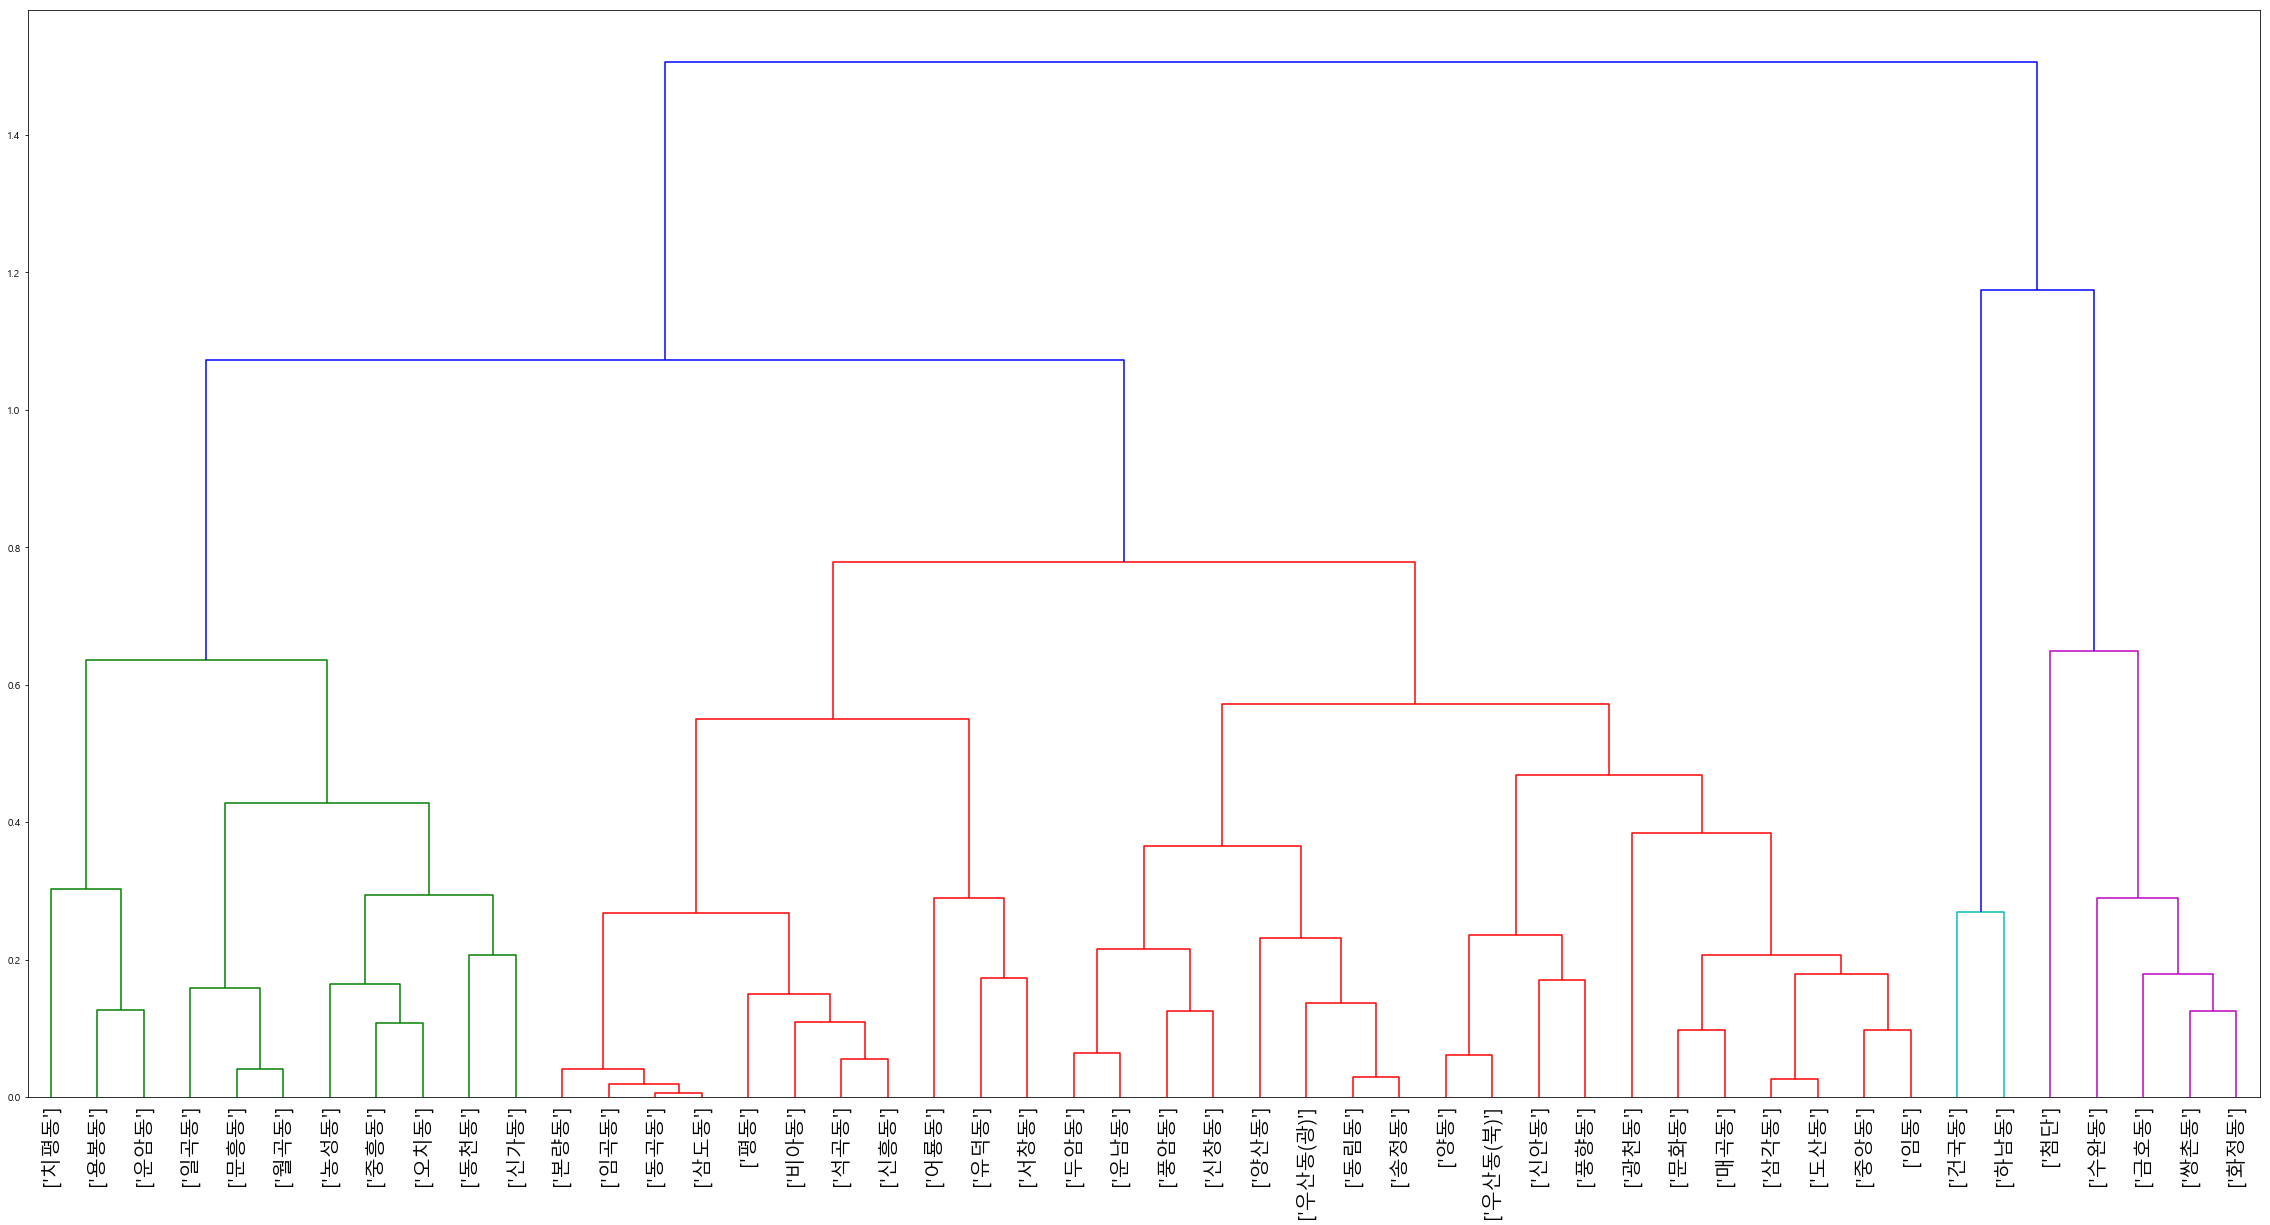

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 라벨 부여 및 정규화
labels = pd.DataFrame(df.동)
labels.columns=['labels']
scaler = MinMaxScaler()

# float형으로 변경 가능한 데이터
sc_data = df.iloc[:, [2, 3, 4, 5]]
sc_data[:] = scaler.fit_transform(sc_data[:])

# 정규화 데이터와 label데이터 합치기
data = pd.concat([sc_data, labels], axis=1)

# Hierarchical clustering 수행
mergings = linkage(data.iloc[:, [0, 1, 3]], method='complete')

# 결과에 대한 dendogram 그리기
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()
